In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("http://oa-icc.ipsl.fr/checking/OAICC_20211203.csv")
df

,Reference,DOI,DOI_PANGAEA,Included/Not included,Reason for non inclusion,Country,Year
0,"Ahnelt, H., Schade, F. M., & Wegner, M., 2016....",doi:10.1111/jfd.12417,NaN,Not included,< 2 carbonate chemistry parameters,EU-Austria,2016
1,"Ahrendt, S., Mobberley, J., Visscher, P., Koss...",doi:10.3390/min4010145,NaN,Not included,< 2 carbonate chemistry parameters,USA,2014
2,"Aires, T., Serebryakova, A., Viard, F., Serrão...",doi:10.7717/peerj.4377,NaN,Not included,< 2 carbonate chemistry parameters,EU-Portugal,2018
3,"Al-Awlaqi, N. A. N., Shazili, N. A. M., & Yuso...",doi:10.17576/mjas-2019-2306-10,NaN,Not included,< 2 carbonate chemistry parameters,Malaysia,2019
4,"Al-Janabi, B., Kruse, I., Graiff, A., Winde, V...",doi:10.1371/journal.pone.0152948,NaN,Not included,< 2 carbonate chemistry parameters,EU-Germany,2016
...,...,...,...,...,...,...,...
2818,"Zittier, Z. M. C., Hirse, T., & Pörtner, H.-O....",doi:10.1007/s00227-012-2073-8,10.1594/PANGAEA.821402,Included,NaN,EU-Germany,2013
2819,"Ziveri, P., Passaro, M., Incarbona, A., Milazz...",doi:10.1086/BBLv226n3p282,10.1594/PANGAEA.838830,Included,NaN,EU-Spain,2014
2820,"Zlatkin, R. L., & Heuer, R. M., 2019. Ocean ac...",doi:10.1098/rsos.191041,10.1594/PANGAEA.912287,Included,NaN,USA,2019
2821,"Zondervan, I., Rost, B., & Riebesell, U., 2002...",doi:10.1016/S0022-0981(02)00037-0,10.1594/PANGAEA.726883,Included,NaN,EU-Germany,2002


In [3]:
df['Year'].unique()

array(['2016', '2014', '2018', '2019', '2012', '2020', '2013', '2011',
       '2017', '2015', '2021', '2009', '1999', '2010', '2005', '2008',
       'in press', '2007', '1995', '2002', '2001', '2022', '2004', '2006',
       '1993', '2000', '1997', '2003', '1991', '1994', '1998', '1996',
       '1967'], dtype=object)

In [4]:
df['Year'].replace('in press', '2022', inplace=True)
df['Year'].unique()

array(['2016', '2014', '2018', '2019', '2012', '2020', '2013', '2011',
       '2017', '2015', '2021', '2009', '1999', '2010', '2005', '2008',
       '2022', '2007', '1995', '2002', '2001', '2004', '2006', '1993',
       '2000', '1997', '2003', '1991', '1994', '1998', '1996', '1967'],
      dtype=object)

In [5]:
df['Year'] = df['Year'].astype(int)

In [6]:
#df = df[df['Year'] < 2022]

In [7]:
df['Reason for non inclusion'].unique()

array(['< 2 carbonate chemistry parameters', 'No answer from authors',
       'Data lost', nan], dtype=object)

In [8]:
a = df[df['Included/Not included'] == 'Included']
b = df[df['Reason for non inclusion'] == 'No answer from authors']
c = df[df['Reason for non inclusion'] == '< 2 carbonate chemistry parameters']
d = df[df['Reason for non inclusion'] == 'Data lost']

In [9]:
a1 = a.groupby('Year').size().cumsum()
b1 = b.groupby('Year').size().cumsum()
c1 = c.groupby('Year').size().cumsum()
d1 = d.groupby('Year').size().cumsum()
d1

Year
1991     1
1993     2
1997     3
1999     6
2001     8
2003    10
2006    12
2012    13
2017    14
2018    15
dtype: int64

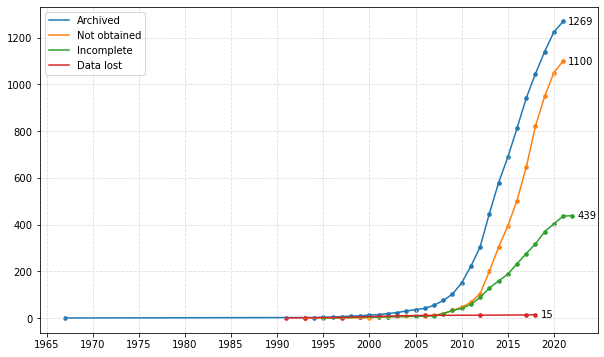

In [61]:
fig, ax = plt.subplots(figsize=[10,6])

#==============================
ax.plot(a1, label="Archived")
ax.scatter(x=a1.index, y=a1, marker='.', s=50)
#==============================
ax.plot(b1, label="Not obtained")
ax.scatter(x=b1.index, y=b1, marker='.', s=50)
#==============================
ax.plot(c1, label="Incomplete")
ax.scatter(x=c1.index, y=c1, marker='.', s=50)
#==============================
ax.plot(d1, label="Data lost")
ax.scatter(x=d1.index, y=d1, marker='.', s=50)

#==============================
for l in ax.lines:
    x,y = l.get_data()
    ax.annotate(y[-1], 
                xy=(x[-1], y[-1]),
                ha='left', va='center',
                xytext=(5, 0), textcoords='offset points', fontsize=10)

#==============================
ax.grid(axis='both', zorder=0, color='gainsboro', linestyle='--')
ax.legend()
#ax.set_xlim(1965, 2030)
ax.xaxis.set_ticks(np.arange(1965, 2025, 5))
plt.show()